In [1]:
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,9

In [6]:
telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [7]:
telecom['amt_data_6'] = telecom[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom['amt_data_7'] = telecom[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)
telecom['amt_data_8'] = telecom[['total_rech_amt_8','total_data_rech_8']].sum(axis=1)

In [8]:
telecom['AVG_amt_data_6_7'] = telecom[['amt_data_6','amt_data_7']].mean(axis=1)

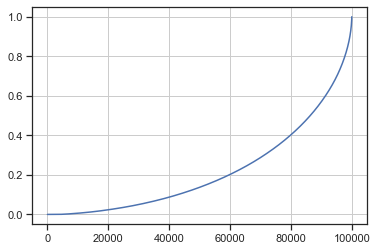

In [9]:
rev = telecom['AVG_amt_data_6_7'].sort_values().reset_index(drop=True)
rev_pct = rev.cumsum()
rev_pct /= rev_pct.iloc[-1]
rev_pct.plot(grid=True)

In [10]:
rev.quantile(np.linspace(.05, 1, 19, 0))

0.05    32.5  
0.10    60.0  
0.15    85.0  
0.20    108.5 
0.25    128.0 
0.30    155.0 
0.35    180.0 
0.40    209.5 
0.45    241.0 
0.50    275.0 
0.55    314.5 
0.60    360.0 
0.65    411.5 
0.70    478.0 
0.75    553.0 
0.80    656.5 
0.85    800.0 
0.90    1028.0
0.95    1512.0
Name: AVG_amt_data_6_7, dtype: float64

In [11]:
highvalue = telecom[telecom['AVG_amt_data_6_7'] > telecom['AVG_amt_data_6_7'].quantile(0.6)]
highvalue.shape

(39901, 233)

In [12]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
6,2572.49,65.91,0.0,0.0
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0


In [13]:
highvalue.loc[
    ((highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00))
    & ((highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00)), ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].shape

(3391, 4)

In [14]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

0    36510
1    3391 
Name: churn_flag, dtype: int64

In [15]:
highvalue['churn_flag'].value_counts()* 100/highvalue.shape[0]

0    91.501466
1    8.498534 
Name: churn_flag, dtype: float64

In [16]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

(39901, 179)

In [17]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39901 entries, 0 to 99998
Data columns (total 179 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             39901 non-null  int64  
 1   circle_id                 39901 non-null  int64  
 2   loc_og_t2o_mou            39627 non-null  float64
 3   std_og_t2o_mou            39627 non-null  float64
 4   loc_ic_t2o_mou            39627 non-null  float64
 5   last_date_of_month_6      39901 non-null  object 
 6   last_date_of_month_7      39854 non-null  object 
 7   last_date_of_month_8      39677 non-null  object 
 8   arpu_6                    39901 non-null  float64
 9   arpu_7                    39901 non-null  float64
 10  arpu_8                    39901 non-null  float64
 11  onnet_mou_6               39201 non-null  float64
 12  onnet_mou_7               39188 non-null  float64
 13  onnet_mou_8               38290 non-null  float64
 14  offne

In [18]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

max_rech_data_8             52.81
av_rech_amt_data_8          52.81
arpu_2g_8                   52.81
arpu_3g_8                   52.81
fb_user_8                   52.81
date_of_last_rech_data_8    52.81
night_pck_user_8            52.81
total_rech_data_8           52.81
total_data_rech_8           52.81
count_rech_3g_8             52.81
count_rech_2g_8             52.81
max_rech_data_6             50.94
av_rech_amt_data_6          50.94
total_rech_data_6           50.94
arpu_3g_6                   50.94
count_rech_3g_6             50.94
arpu_2g_6                   50.94
night_pck_user_6            50.94
date_of_last_rech_data_6    50.94
count_rech_2g_6             50.94
total_data_rech_6           50.94
fb_user_6                   50.94
arpu_2g_7                   50.08
count_rech_2g_7             50.08
count_rech_3g_7             50.08
total_data_rech_7           50.08
av_rech_amt_data_7          50.08
max_rech_data_7             50.08
total_rech_data_7           50.08
arpu_3g_7     

In [19]:
unique_stats = pd.DataFrame(highvalue.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

                 feature  nunique
1   circle_id             1      
2   loc_og_t2o_mou        1      
3   std_og_t2o_mou        1      
4   loc_ic_t2o_mou        1      
5   last_date_of_month_6  1      
6   last_date_of_month_7  1      
7   last_date_of_month_8  1      
47  std_og_t2c_mou_6      1      
48  std_og_t2c_mou_7      1      
49  std_og_t2c_mou_8      1      
86  std_ic_t2o_mou_6      1      
87  std_ic_t2o_mou_7      1      
88  std_ic_t2o_mou_8      1      


In [20]:
print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

13 features with a single unique value.



In [21]:
highvalue = highvalue.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))
highvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8,amt_data_6,amt_data_7,amt_data_8,AVG_amt_data_6_7,churn_flag
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1
6,7001051193,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,0.0,0.0,0.0,333.76,94.81,168.74,1857.99,1427.04,1896.43,248.64,336.96,265.28,20.24,22.69,2.51,2126.89,1786.71,2164.23,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,1.39,0.76,2.60,2128.41,1788.06,2167.11,0.00,0.0,0.0,0.00,0.00,0.00,0.11,0.58,0.28,15,10,11,499,222,294,90,37,50,6/28/2014,7/31/2014,8/28/2014,37,24,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1673,0

In [22]:
highvalue.shape

(39901, 166)

# Missing Values

## arpu_3g_8

In [23]:
highvalue['arpu_3g_8'].isna().sum()

21071

In [24]:
round(highvalue['arpu_3g_8'].isna().sum()*100/highvalue.shape[0],2)

52.81

In [25]:
highvalue['arpu_3g_8'].describe()

count    18830.000000
mean     107.046052  
std      207.172006  
min     -24.490000   
25%      0.000000    
50%      4.650000    
75%      150.680000  
max      3716.900000 
Name: arpu_3g_8, dtype: float64

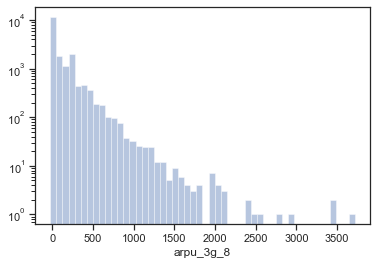

In [26]:
ax=sns.distplot(highvalue['arpu_3g_8'],kde=False)
ax.set_yscale('log')
plt.show()

In [27]:
highvalue.filter(regex='_8|aug', axis=1).columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rech_amt_8',
       'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8',
       'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sac

In [28]:
rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

In [29]:
highvalue[highvalue['arpu_3g_8'].isna()][list(map(lambda ele : ele + '_8', rech_data_cols))].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_3g_8                   0
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [30]:
highvalue[highvalue['arpu_3g_8'].isna()][list(map(lambda ele : ele + '_8', rech_data_cols))].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


In [31]:
highvalue['arpu_3g_8'].fillna(0, inplace=True)
highvalue['arpu_3g_8'].isna().sum()

0

In [32]:
fill_cols = ['date_of_last_rech_data_8', 'av_rech_amt_data_8', 'count_rech_2g_8',
             'total_data_rech_8', 'max_rech_data_8', 'count_rech_3g_8',
             'total_rech_data_8', 'arpu_2g_8', 'fb_user_8', 'night_pck_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

date_of_last_rech_data_8    0
av_rech_amt_data_8          0
count_rech_2g_8             0
total_data_rech_8           0
max_rech_data_8             0
count_rech_3g_8             0
total_rech_data_8           0
arpu_2g_8                   0
fb_user_8                   0
night_pck_user_8            0
dtype: int64

In [33]:
highvalue[highvalue['arpu_3g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

In [34]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

fb_user_6                   0
arpu_3g_6                   0
max_rech_data_6             0
arpu_2g_6                   0
total_rech_data_6           0
total_data_rech_6           0
av_rech_amt_data_6          0
night_pck_user_6            0
count_rech_2g_6             0
date_of_last_rech_data_6    0
count_rech_3g_6             0
dtype: int64

In [35]:
highvalue[highvalue['arpu_3g_7'].isna()][list(map(lambda ele : ele + '_7', rech_data_cols))].nunique()

date_of_last_rech_data_7    0
total_rech_data_7           0
max_rech_data_7             0
count_rech_2g_7             0
count_rech_3g_7             0
av_rech_amt_data_7          0
vol_2g_mb_7                 1
vol_3g_mb_7                 1
arpu_3g_7                   0
arpu_2g_7                   0
night_pck_user_7            0
monthly_2g_7                1
sachet_2g_7                 1
monthly_3g_7                1
sachet_3g_7                 1
fb_user_7                   0
dtype: int64

In [37]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

total_rech_data_7           0
max_rech_data_7             0
date_of_last_rech_data_7    0
night_pck_user_7            0
fb_user_7                   0
count_rech_3g_7             0
arpu_2g_7                   0
total_data_rech_7           0
av_rech_amt_data_7          0
arpu_3g_7                   0
count_rech_2g_7             0
dtype: int64

## loc_og_mou_8

In [38]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

loc_og_mou_8                4.04
std_ic_t2t_mou_8            4.04
loc_og_t2f_mou_8            4.04
isd_ic_mou_8                4.04
loc_og_t2c_mou_8            4.04
std_og_t2t_mou_8            4.04
ic_others_8                 4.04
std_og_t2m_mou_8            4.04
std_og_t2f_mou_8            4.04
std_og_mou_8                4.04
loc_og_t2t_mou_8            4.04
std_ic_t2f_mou_8            4.04
isd_og_mou_8                4.04
spl_og_mou_8                4.04
loc_ic_mou_8                4.04
og_others_8                 4.04
loc_ic_t2f_mou_8            4.04
loc_ic_t2t_mou_8            4.04
loc_og_t2m_mou_8            4.04
loc_ic_t2m_mou_8            4.04
offnet_mou_8                4.04
spl_ic_mou_8                4.04
roam_og_mou_8               4.04
std_ic_t2m_mou_8            4.04
onnet_mou_8                 4.04
std_ic_mou_8                4.04
roam_ic_mou_8               4.04
date_of_last_rech_8         2.13
onnet_mou_7                 1.79
offnet_mou_7                1.79
std_ic_t2t

In [39]:
highvalue['isd_og_mou_8'].isna().sum()

1611

In [40]:
og_8_cols = highvalue.filter(regex='og.*_8').columns

In [41]:
highvalue[highvalue['loc_og_mou_8'].isna()][og_8_cols].nunique()

roam_og_mou_8       0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_8    0
loc_og_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
isd_og_mou_8        0
spl_og_mou_8        0
og_others_8         0
total_og_mou_8      1
dtype: int64

In [42]:
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

total_rech_data_7           0
max_rech_data_7             0
date_of_last_rech_data_7    0
night_pck_user_7            0
fb_user_7                   0
count_rech_3g_7             0
arpu_2g_7                   0
total_data_rech_7           0
av_rech_amt_data_7          0
arpu_3g_7                   0
count_rech_2g_7             0
dtype: int64

In [43]:
ic_8_cols = highvalue.filter(regex='ic.*_8').columns

In [44]:
highvalue[highvalue['isd_ic_mou_8'].isna()][ic_8_cols].nunique()

roam_ic_mou_8       0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_8    0
loc_ic_mou_8        0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_8    0
std_ic_mou_8        0
total_ic_mou_8      1
spl_ic_mou_8        0
isd_ic_mou_8        0
ic_others_8         0
dtype: int64

In [45]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

loc_og_mou_8        0
std_ic_t2t_mou_8    0
loc_og_t2f_mou_8    0
isd_ic_mou_8        0
loc_og_t2c_mou_8    0
std_og_t2t_mou_8    0
ic_others_8         0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
loc_og_t2t_mou_8    0
std_ic_t2f_mou_8    0
isd_og_mou_8        0
spl_og_mou_8        0
loc_ic_mou_8        0
og_others_8         0
loc_ic_t2f_mou_8    0
loc_ic_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_ic_t2m_mou_8    0
offnet_mou_8        0
spl_ic_mou_8        0
roam_og_mou_8       0
std_ic_t2m_mou_8    0
onnet_mou_8         0
std_ic_mou_8        0
roam_ic_mou_8       0
dtype: int64

In [46]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [47]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_8
188,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
191,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
315,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
490,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
578,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    2
total_rech_data_8           2
max_rech_data_8             2
count_rech_2g_8             2
count_rech_3g_8             1
av_rech_amt_data_8          2
total_data_rech_8           2
dtype: int64

In [55]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_8
25540,0,0,0,NaN,0,8/12/2014,1.0,154.0,1.0,0.0,154.0,154.0


In [56]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    1
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             1
count_rech_3g_8             1
av_rech_amt_data_8          1
total_data_rech_8           1
dtype: int64

In [57]:
zero_row.head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_8
188,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
191,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
315,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
490,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
578,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# drop the single non_zero_row
highvalue.drop(non_zero_row.index, inplace=True)

In [73]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

In [160]:
# 删除 highvalue['date_of_last_rech_data_8'] != 0 这一行，其他行都变成 0

In [74]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

std_ic_mou_7                1.79
loc_og_t2t_mou_7            1.79
std_og_t2f_mou_7            1.79
isd_og_mou_7                1.79
std_og_t2m_mou_7            1.79
spl_og_mou_7                1.79
std_og_t2t_mou_7            1.79
og_others_7                 1.79
loc_og_mou_7                1.79
loc_ic_t2t_mou_7            1.79
loc_og_t2c_mou_7            1.79
loc_ic_t2m_mou_7            1.79
loc_og_t2f_mou_7            1.79
loc_ic_t2f_mou_7            1.79
loc_og_t2m_mou_7            1.79
loc_ic_mou_7                1.79
std_og_mou_7                1.79
onnet_mou_7                 1.79
roam_og_mou_7               1.79
std_ic_t2m_mou_7            1.79
spl_ic_mou_7                1.79
roam_ic_mou_7               1.79
ic_others_7                 1.79
std_ic_t2f_mou_7            1.79
offnet_mou_7                1.79
std_ic_t2t_mou_7            1.79
isd_ic_mou_7                1.79
std_ic_t2t_mou_6            1.75
std_ic_mou_6                1.75
isd_og_mou_6                1.75
spl_og_mou

In [76]:
og_ic_7_cols = highvalue.filter(regex='(og|ic).*_7').columns
og_ic_7_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7',
       'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7'],
      dtype='object')

In [77]:
highvalue[highvalue['std_ic_mou_7'].isna()][og_ic_7_cols].nunique()

roam_ic_mou_7       0
roam_og_mou_7       0
loc_og_t2t_mou_7    0
loc_og_t2m_mou_7    0
loc_og_t2f_mou_7    0
loc_og_t2c_mou_7    0
loc_og_mou_7        0
std_og_t2t_mou_7    0
std_og_t2m_mou_7    0
std_og_t2f_mou_7    0
std_og_mou_7        0
isd_og_mou_7        0
spl_og_mou_7        0
og_others_7         0
total_og_mou_7      1
loc_ic_t2t_mou_7    0
loc_ic_t2m_mou_7    0
loc_ic_t2f_mou_7    0
loc_ic_mou_7        0
std_ic_t2t_mou_7    0
std_ic_t2m_mou_7    0
std_ic_t2f_mou_7    0
std_ic_mou_7        0
total_ic_mou_7      1
spl_ic_mou_7        0
isd_ic_mou_7        0
ic_others_7         0
dtype: int64

In [78]:
highvalue[highvalue['std_ic_mou_7'].isna()][og_ic_7_cols].head()

,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [79]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

std_ic_mou_7        0
loc_og_t2t_mou_7    0
std_og_t2f_mou_7    0
isd_og_mou_7        0
std_og_t2m_mou_7    0
spl_og_mou_7        0
std_og_t2t_mou_7    0
og_others_7         0
loc_og_mou_7        0
loc_ic_t2t_mou_7    0
loc_og_t2c_mou_7    0
loc_ic_t2m_mou_7    0
loc_og_t2f_mou_7    0
loc_ic_t2f_mou_7    0
loc_og_t2m_mou_7    0
loc_ic_mou_7        0
std_og_mou_7        0
onnet_mou_7         0
roam_og_mou_7       0
std_ic_t2m_mou_7    0
spl_ic_mou_7        0
roam_ic_mou_7       0
ic_others_7         0
std_ic_t2f_mou_7    0
offnet_mou_7        0
std_ic_t2t_mou_7    0
isd_ic_mou_7        0
dtype: int64

In [80]:
og_ic_6_cols = highvalue.filter(regex='(og|ic).*_6').columns
og_ic_6_cols

Index(['roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [81]:
highvalue[highvalue['std_ic_mou_6'].isna()][og_ic_6_cols].nunique()

roam_ic_mou_6       0
roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
og_others_6         0
total_og_mou_6      1
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      1
spl_ic_mou_6        0
isd_ic_mou_6        0
ic_others_6         0
dtype: int64

In [82]:
highvalue[highvalue['std_ic_mou_6'].isna()][og_ic_6_cols].head()

,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [83]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

std_ic_t2t_mou_6    0
std_ic_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
isd_ic_mou_6        0
loc_ic_t2t_mou_6    0
og_others_6         0
std_ic_t2f_mou_6    0
ic_others_6         0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
std_ic_t2m_mou_6    0
std_og_mou_6        0
loc_ic_mou_6        0
spl_ic_mou_6        0
roam_ic_mou_6       0
onnet_mou_6         0
loc_og_t2t_mou_6    0
loc_og_t2f_mou_6    0
roam_og_mou_6       0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
offnet_mou_6        0
loc_og_t2m_mou_6    0
std_og_t2t_mou_6    0
std_og_t2f_mou_6    0
std_og_t2m_mou_6    0
dtype: int64

In [ ]:
# date_of_last_rech_7

In [94]:
highvalue[highvalue['date_of_last_rech_7'].isna()][list(map(lambda ele : ele + '_7', rech_cols))].nunique()

total_rech_num_7            1
total_rech_amt_7            1
max_rech_amt_7              1
date_of_last_rech_7         0
last_day_rech_amt_7         1
date_of_last_rech_data_7    1
total_rech_data_7           1
max_rech_data_7             1
count_rech_2g_7             1
count_rech_3g_7             1
av_rech_amt_data_7          1
vol_2g_mb_7                 1
vol_3g_mb_7                 1
arpu_3g_7                   1
arpu_2g_7                   1
night_pck_user_7            1
monthly_2g_7                1
sachet_2g_7                 1
monthly_3g_7                1
sachet_3g_7                 1
fb_user_7                   1
dtype: int64

In [95]:
highvalue[highvalue['date_of_last_rech_7'].isna()][list(map(lambda ele : ele + '_7', rech_cols))].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7
490,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
603,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
679,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
1374,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
1555,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [96]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)
highvalue['date_of_last_rech_7'].isna().sum()

0

In [97]:
highvalue[highvalue['date_of_last_rech_6'].isna()][list(map(lambda ele : ele + '_6', rech_cols))].nunique()

total_rech_num_6            1
total_rech_amt_6            1
max_rech_amt_6              1
date_of_last_rech_6         0
last_day_rech_amt_6         1
date_of_last_rech_data_6    1
total_rech_data_6           1
max_rech_data_6             1
count_rech_2g_6             1
count_rech_3g_6             1
av_rech_amt_data_6          1
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   1
arpu_2g_6                   1
night_pck_user_6            1
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   1
dtype: int64

In [98]:
highvalue[highvalue['date_of_last_rech_6'].isna()][list(map(lambda ele : ele + '_6', rech_cols))].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
91,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
414,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
1576,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
1708,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
4537,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [99]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)
highvalue['date_of_last_rech_6'].isna().sum()

0

In [102]:
# 缺失值处理完毕
highvalue.isna().values.any()

False

In [103]:
date_cols = highvalue.filter(regex='date').columns
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [104]:
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39900 entries, 0 to 99998
Data columns (total 166 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mobile_number             39900 non-null  int64         
 1   arpu_6                    39900 non-null  float64       
 2   arpu_7                    39900 non-null  float64       
 3   arpu_8                    39900 non-null  float64       
 4   onnet_mou_6               39900 non-null  float64       
 5   onnet_mou_7               39900 non-null  float64       
 6   onnet_mou_8               39900 non-null  float64       
 7   offnet_mou_6              39900 non-null  float64       
 8   offnet_mou_7              39900 non-null  float64       
 9   offnet_mou_8              39900 non-null  float64       
 10  roam_ic_mou_6             39900 non-null  float64       
 11  roam_ic_mou_7             39900 non-null  float64       
 12  roam_ic_mou_8    